In [3]:
import os
import math
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import preprocessing as skpp
from sklearn.model_selection import train_test_split 
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
filepath=os.path.join('international-airline-passengers.csv')

In [5]:
dataframe=pd.read_csv(filepath,usecols=[1],header=0)

In [6]:
dataframe.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [7]:
dataset=dataframe.values
dataset=dataframe.astype(np.float32)

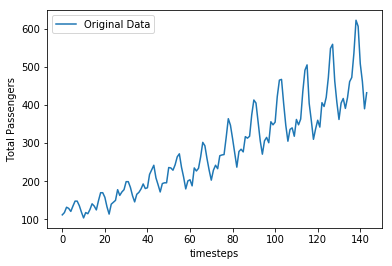

In [8]:
plt.plot(dataset,label='Original Data')
plt.legend()
plt.xlabel('timesteps')
plt.ylabel('Total Passengers')
plt.show()

In [9]:
# normalize the dataset
scaler = skpp.MinMaxScaler(feature_range=(0, 1))
impute=skpp.Imputer()
imput_dataset = impute.fit_transform(dataset)
normalized_dataset=scaler.fit_transform(imput_dataset)

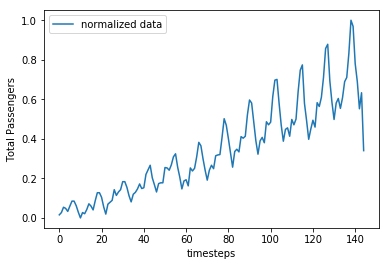

In [10]:
plt.plot(normalized_dataset,label='normalized data')
plt.legend()
plt.xlabel('timesteps')
plt.ylabel('Total Passengers')
plt.show()

In [11]:
print(normalized_dataset.shape)
normal_dataset=[]
y_index=[]
#for i in range(normalized_dataset.shape[0]):
#    print(i,normalized_dataset.item(i))
#    y_index.append(i)
#y_index=np.asarray(y_index)
x=np.asarray(normalized_dataset[0:-1])
y=np.asarray(normalized_dataset[1:])




(145, 1)


In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,shuffle=False)


In [13]:
print(X_train)

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.19111969]
 [0.24

# tensorflow RNN

In [14]:
n_x=1
n_y=1

In [15]:
tf.reset_default_graph()

In [16]:
state_size=4
n_epochs=100
n_timesteps=n_x
learning_rate=0.1

In [17]:
n_x_vars = 1  # number of x variables
n_y_vars = 1  # number of y variables

In [18]:
X_p=tf.placeholder(tf.float32,[None,n_timesteps,n_x_vars],name='X_p' )
Y_p=tf.placeholder(tf.float32,[None,n_timesteps,n_y_vars],name='Y_p' )

In [19]:
#make a list of tensors length n_timesteps
rnn_inputs=tf.unstack(X_p,axis=1)

In [20]:
cell=tf.nn.rnn_cell.BasicRNNCell(state_size)

In [21]:
rnn_outputs,final_state=tf.nn.static_rnn(cell,rnn_inputs,dtype=tf.float32)

In [22]:
W=tf.get_variable('W',[state_size,n_y_vars])
b=tf.get_variable('b',[n_y_vars],initializer=tf.constant_initializer(0.0))


In [23]:
predictions=[tf.matmul(rnn_output,W)+b for rnn_output in rnn_outputs]
print(predictions)

[<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>]


In [24]:
y_as_list=tf.unstack(Y_p,num=n_timesteps,axis=1)
print(y_as_list)

[<tf.Tensor 'unstack_1:0' shape=(?, 1) dtype=float32>]


In [25]:
mse=tf.losses.mean_squared_error

In [26]:
losses=[mse(labels=label,predictions=prediction) for prediction , label in zip(predictions,y_as_list)]

In [27]:
total_loss=tf.reduce_mean(losses)

In [28]:
optmizer=tf.train.AdagradOptimizer(learning_rate=learning_rate).minimize(total_loss)

In [29]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    epoch_loss=0.0
    for epoch in range(n_epochs):
        feed_dict={X_p:X_train.reshape(-1,n_timesteps,n_x_vars),Y_p:Y_train.reshape(-1,n_timesteps,n_x_vars)}
        epoch_loss,y_train_pred,_=tfs.run([total_loss,predictions,optmizer],feed_dict=feed_dict)
        print("train mse= {}".format(epoch_loss))
        feed_dict={X_p: X_test.reshape(-1, n_timesteps, 
                                    n_x_vars), 
               Y_p: Y_test.reshape(-1, n_timesteps, 
                                    n_y_vars)
              }
        test_loss, y_test_pred = tfs.run([total_loss,predictions], 
                                     feed_dict=feed_dict
                                    )
        print('test mse = {}'.format(test_loss))
        print('test rmse = {}'.format(math.sqrt(test_loss)))
        

train mse= 0.2806793749332428
test mse = 0.872633695602417
test rmse = 0.9341486474873348
train mse= 0.09698884934186935
test mse = 0.6705606579780579
test rmse = 0.8188776819391635
train mse= 0.06908328086137772
test mse = 0.577721893787384
test rmse = 0.7600801890507238
train mse= 0.06114540621638298
test mse = 0.5259750485420227
test rmse = 0.7252413726077841
train mse= 0.05754129961133003
test mse = 0.492509126663208
test rmse = 0.7017899448290834
train mse= 0.05507127568125725
test mse = 0.4680044651031494
test rmse = 0.6841085185138023
train mse= 0.052985165268182755
test mse = 0.4482819139957428
test rmse = 0.6695385829029891
train mse= 0.05108998343348503
test mse = 0.4313530921936035
test rmse = 0.6567747651924544
train mse= 0.04932805523276329
test mse = 0.4162229299545288
test rmse = 0.6451534158279942
train mse= 0.04767667129635811
test mse = 0.4023670256137848
test rmse = 0.6343240698679066
train mse= 0.04612308368086815
test mse = 0.38949188590049744
test rmse = 0.6240928

In [30]:
#y_train_pred=y_train_pred[0]

y_train_pred=np.asarray(y_train_pred).flatten()
y_test_pred=np.asarray(y_test_pred).flatten()

print(y_train_pred)


[0.12883437 0.13407388 0.14631793 0.14369224 0.13669553 0.14894454
 0.16033581 0.16033581 0.14982027 0.13494763 0.12185702 0.13407388
 0.13145348 0.14106758 0.15420033 0.14894454 0.14019293 0.1612126
 0.17963554 0.17963554 0.1691061  0.14719336 0.13058029 0.15332413
 0.15770587 0.16208944 0.18665627 0.17349291 0.1813907  0.18665627
 0.20507947 0.20507947 0.19192149 0.17261548 0.15858245 0.17612535
 0.18051313 0.18841141 0.19981748 0.18928894 0.191044   0.22172515
 0.23221897 0.24269286 0.21384422 0.19806308 0.1813907  0.20069462
 0.20244873 0.20244873 0.23745868 0.23658575 0.2313452  0.24356462
 0.26182914 0.26876265 0.23833144 0.21559621 0.18841141 0.206833
 0.20946279 0.19543117 0.23658575 0.22959723 0.23571268 0.26182914
 0.29461735 0.28688723 0.25748843 0.2313452  0.20858625 0.2313452
 0.24269286 0.23483948 0.2644309  0.2661643  0.26703066 0.30573878
 0.34711048 0.33286342 0.30317715 0.2704937  0.23833144 0.27395278
 0.27913386 0.2730884  0.3074448  0.30403134 0.30829734 0.35543323

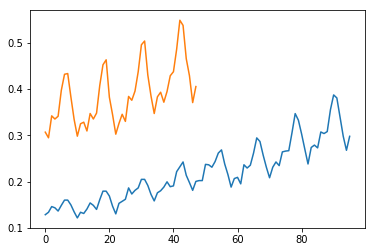

In [31]:
plt.plot(y_train_pred)
#plt.plot(y_train_orig)
plt.plot(y_test_pred)
#plt.plot(y_test_orig)

In [32]:
#invert predictions
#y_train_pred=y_train_pred[0]
#y_test_pred=y_test_pred[0]

y_train_pred = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

#invert originals
y_train_orig = scaler.inverse_transform(Y_train)
y_test_orig = scaler.inverse_transform(Y_test)

In [33]:
dataset.shape

(145, 1)

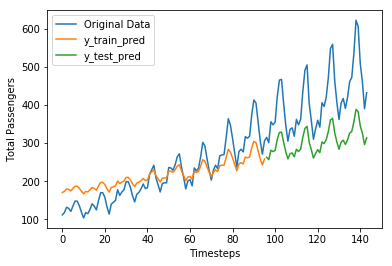

In [34]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan

for i in range(y_train_pred.shape[0]):
    trainPredictPlot[i,:]=y_train_pred[i]
#trainPredictPlot[0:len(y_train_pred), :] = y_train_pred
#trainPredictPlot[:, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+(n_x*2)-1-1:len(dataset)-1, :]=y_test_pred 
#plot baseline and predictions
plt.plot(dataset,label='Original Data')
plt.plot(trainPredictPlot,label='y_train_pred')
plt.plot(testPredictPlot,label='y_test_pred')
plt.legend()
plt.xlabel('Timesteps')
plt.ylabel('Total Passengers')
plt.show()